In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("/Documents/Personnel/Programmation/Datasets/openpowerlifting.csv")

#Ôtons les colonnes non-nécessaires et transférons les unités en lbs
cols=["MeetID","Squat4Kg","Bench4Kg","Deadlift4Kg","Division"]
df=df.drop(cols,axis=1)
df.head(5)

,Name,Sex,Equipment,Age,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,Angie Belk Terry,F,Wraps,47.0,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,Dawn Bogart,F,Single-ply,42.0,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,Dawn Bogart,F,Single-ply,42.0,58.51,60,142.88,95.25,163.29,401.42,1,456.38
3,Dawn Bogart,F,Raw,42.0,58.51,60,NaN,95.25,NaN,95.25,1,108.29
4,Destiny Dula,F,Raw,18.0,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47


In [3]:
#Valeurs manquantes
df.isnull().sum()

Name                   0
Sex                    0
Equipment              0
Age               239267
BodyweightKg        2402
WeightClassKg       3812
BestSquatKg        88343
BestBenchKg        30050
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
dtype: int64

In [4]:
#Dropper les lignes avec des valeurs manquantes
df.dropna(subset=["Age","BodyweightKg","BestSquatKg","BestBenchKg","BestDeadliftKg","TotalKg"],inplace=True)
df.reset_index()
df.shape

(106705, 12)

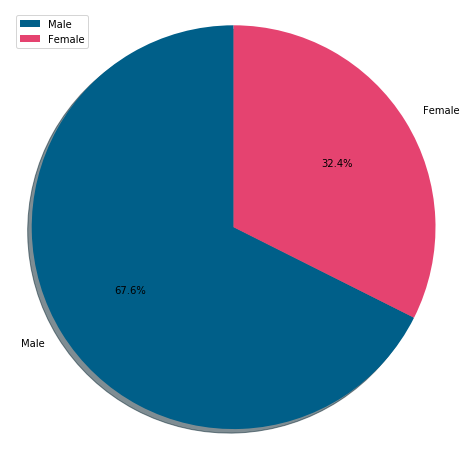

In [5]:
#Commençons par déterminer le sex des personnes qui participent à des compétitions de powerlifting
total=df["Sex"].value_counts().tolist()


plt.figure(figsize=(8,8))
plt.pie(total,labels=["Male","Female"], autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#005f89","#e54370"])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="best")

In [6]:
#Créons maintenant les catégories pour faire des graphiques:
min_val=min(df["Age"])
max_val=max(df["Age"])
print(min_val,max_val)

def age_function(x):
    if x<10:
        return "05-10"
    elif 10<=x<20:
        return "10-20"
    elif 20<=x<30:
        return "20-30"
    elif 30<=x<40:
        return "30-40"
    elif 40<=x<50:
        return "40-50"
    elif 50<=x<60:
        return "50-60"
    elif 60<=x<70:
        return "60-70"
    elif 70<=x<80:
        return "70-80"
    elif 80<=x<90:
        return "80-90"
    elif x>=90:
        return "90-100"
    
df["Catégorie"]=df["Age"].apply(age_function)

7.0 93.0


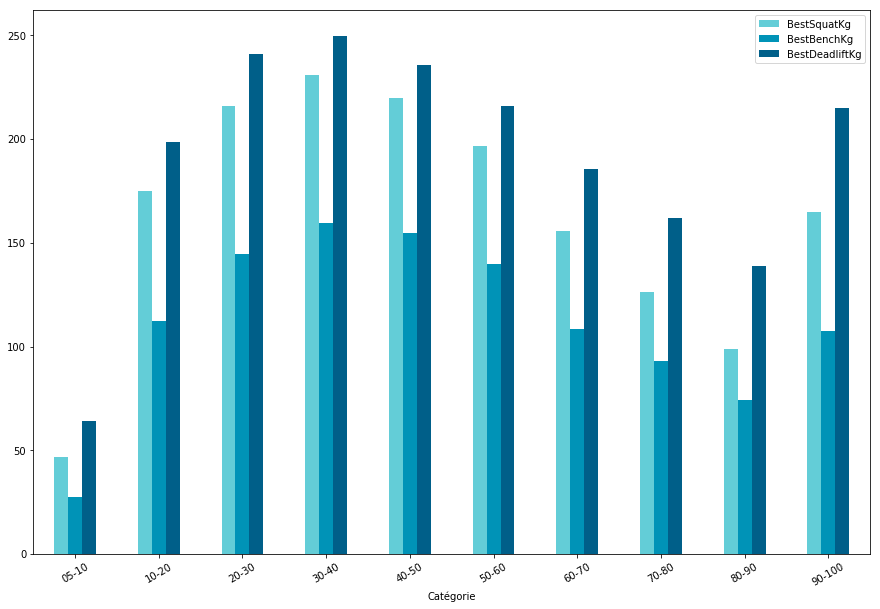

In [7]:
#Calculons maintenant des statistiques en fonction des classes qui viennent d'être créées
df_male=df[df["Sex"]=="M"]
df_fem=df[df["Sex"]=="F"]

lifting_avg_m=df_male.groupby("Catégorie")[["BestSquatKg","BestBenchKg","BestDeadliftKg"]].mean().reset_index()
lifting_avg_f=df_fem.groupby("Catégorie")[["BestSquatKg","BestBenchKg","BestDeadliftKg"]].mean().reset_index()



lifting_avg_m.plot(kind = 'bar', color = ['#63cdd7','#0093b7','#005f89'], figsize = (15,10), x = 'Catégorie', rot = 30)


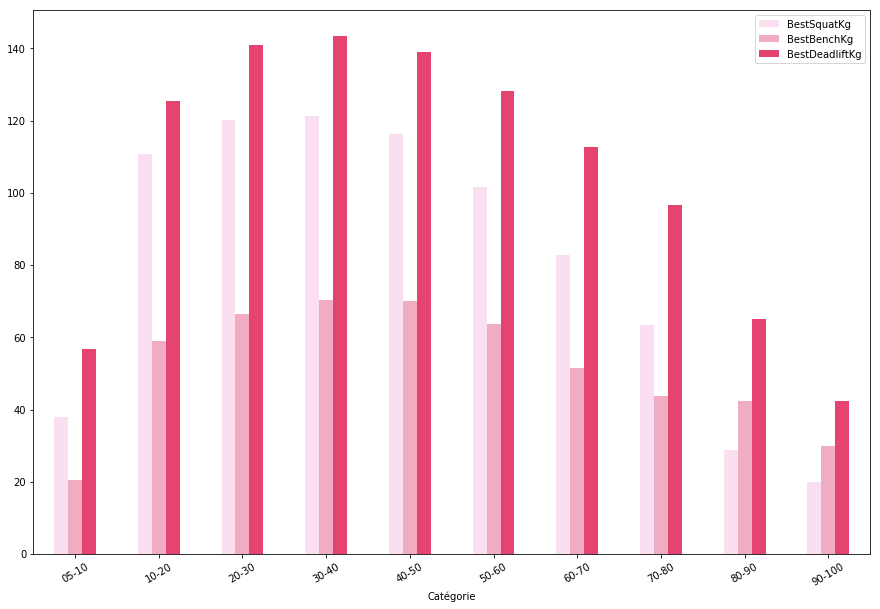

In [8]:
lifting_avg_f.plot(kind = 'bar', color = ['#f9dff0','#f0acc3','#e54370'], figsize = (15,10), x = 'Catégorie', rot = 30)

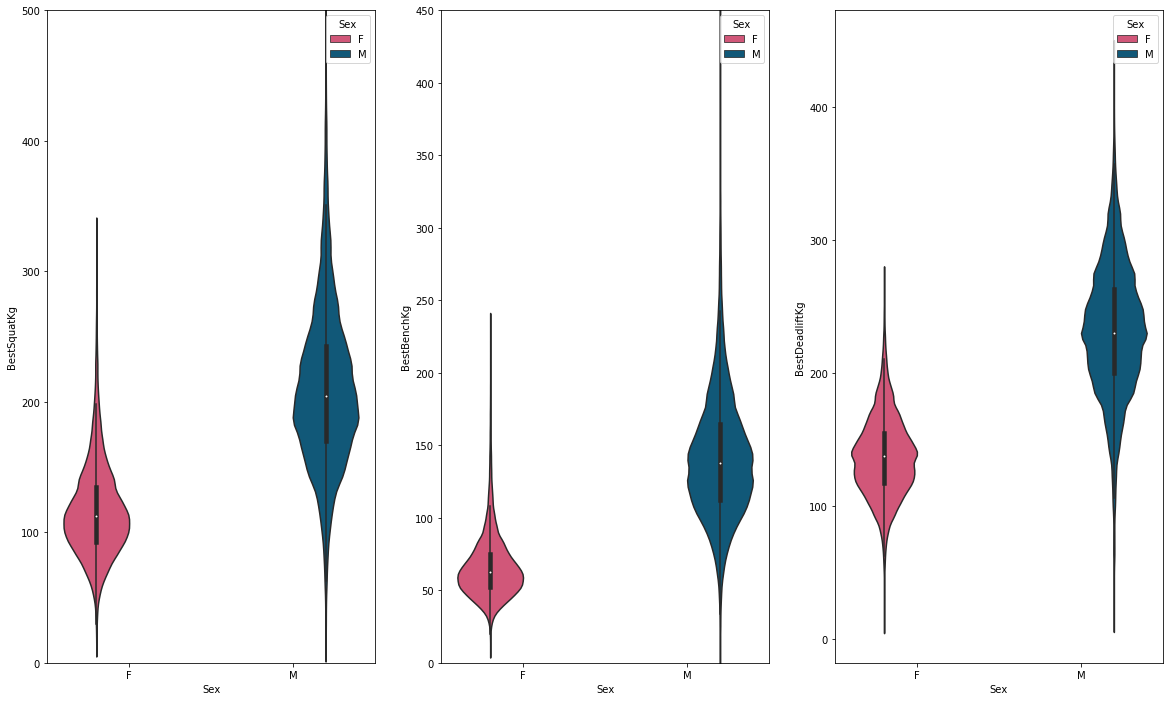

In [9]:
plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
sns.violinplot(data=df,x="Sex",y="BestSquatKg",hue="Sex",palette=["#e54370","#005f89"])
plt.ylim(0,500)

plt.subplot(1,3,2)
sns.violinplot(data=df,x="Sex",y="BestBenchKg",hue="Sex",palette=["#e54370","#005f89"])
plt.ylim(0,450)

plt.subplot(1,3,3)
sns.violinplot(data=df,x="Sex",y="BestDeadliftKg",hue="Sex",palette=["#e54370","#005f89"])




In [10]:
#Examinons maintenant le ratios différents lifts par rapport au poids de la personne
df_male["SquatBW"]=df_male["BestSquatKg"]/df_male["BodyweightKg"]
df_fem["SquatBW"]=df_fem["BestSquatKg"]/df_fem["BodyweightKg"]

df_male["BenchBW"]=df_male["BestBenchKg"]/df_male["BodyweightKg"]
df_fem["BenchBW"]=df_fem["BestBenchKg"]/df_fem["BodyweightKg"]

df_male["DeadliftBW"]=df_male["BestDeadliftKg"]/df_male["BodyweightKg"]
df_fem["DeadliftBW"]=df_fem["BestDeadliftKg"]/df_fem["BodyweightKg"]

lifting_bw_m=df_male.groupby("Catégorie")[["SquatBW","BenchBW","DeadliftBW"]].mean().reset_index()
lifting_bw_f=df_fem.groupby("Catégorie")[["SquatBW","BenchBW","DeadliftBW"]].mean().reset_index()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

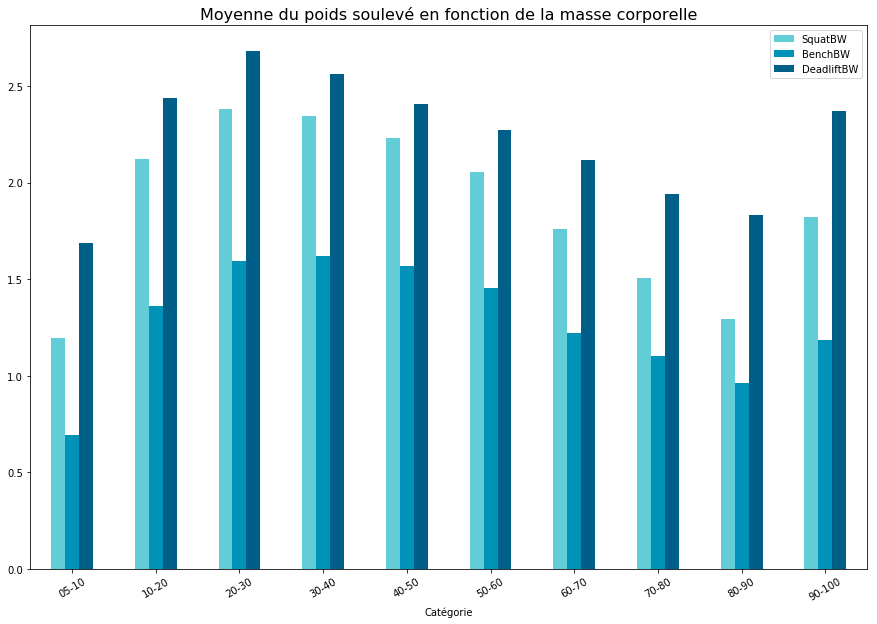

In [11]:

lifting_bw_m.plot(kind = 'bar', color = ['#63cdd7','#0093b7','#005f89'], figsize = (15,10), x = 'Catégorie', rot = 30)
plt.title("Moyenne du poids soulevé en fonction de la masse corporelle",size=16)

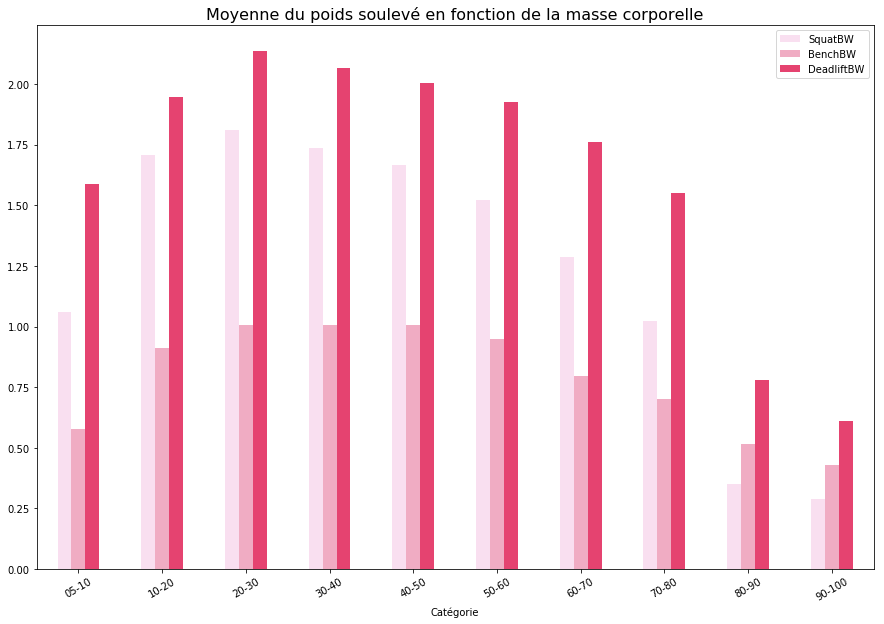

In [12]:
lifting_bw_f.plot(kind = 'bar', color = ['#f9dff0','#f0acc3','#e54370'], figsize = (15,10), x = 'Catégorie', rot = 30)
plt.title("Moyenne du poids soulevé en fonction de la masse corporelle",size=16)

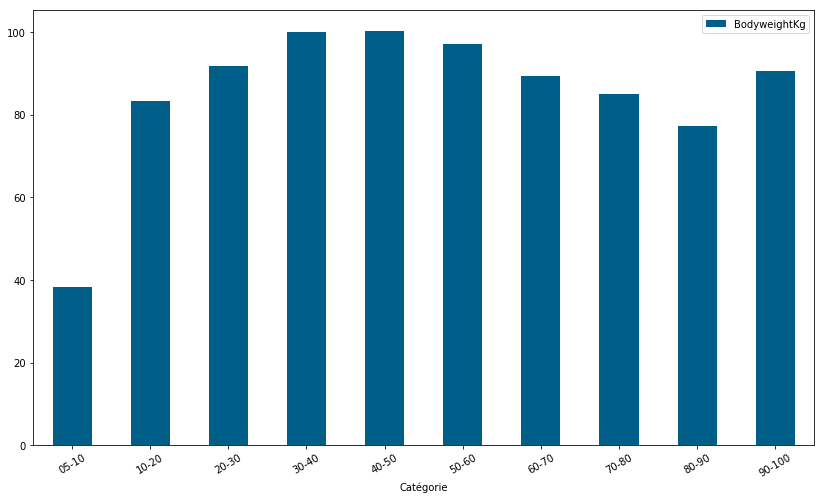

In [37]:
#Examinons maintenant le poids des personnes qui participent aux compétitions chez les hommes
bw_male=df_male.groupby("Catégorie")["BodyweightKg"].mean().reset_index()

bw_male.plot(kind="bar", color=['#005f89'], x = 'Catégorie', rot = 30,figsize=(14,8))





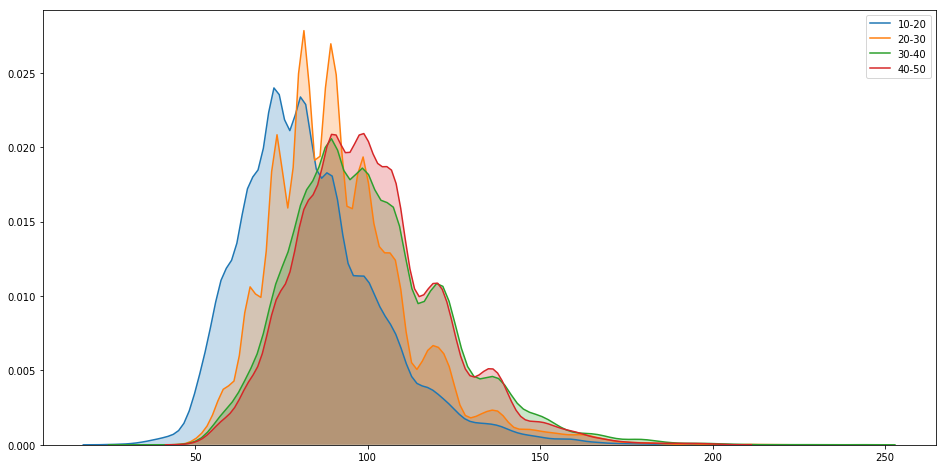

In [52]:
#Distribution de densité des âges pour les catégories allant de 10 à 50 ans chez les hommes
age_categories=["10-20","20-30","30-40","40-50"]
plt.figure(figsize=(16,8))
for i in age_categories:
    sns.kdeplot(df_male["BodyweightKg"][df_male["Catégorie"]==i],shade=True,label=i)
    



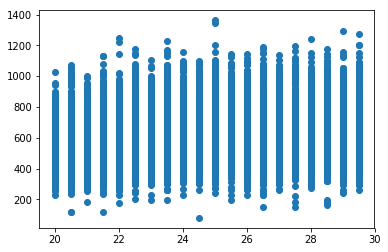

In [55]:
#Regardons un graphique pour le groupe qui nous intéresse, soit les 20-30 ans
plt.scatter(df_male["Age"][df_male["Catégorie"]=="20-30"],df_male["TotalKg"][df_male["Catégorie"]=="20-30"])